In [0]:
import boto3
import pandas as pd

from pyspark.ml.feature import StopWordsRemover, Tokenizer, RegexTokenizer, FeatureHasher
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import StringIndexer

from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
class Tweets_Classification:
    def __init__(self, aws_access_key_id = "XXXXXXXXXX", 
                 aws_secret_access_key = "XXXXXXXXXXXX/XXXXXX+8", 
                 bucket_name = "bucket", 
                 input_file = "datafile/T_T100D_SEGMENT_US_CARRIER_ONLY.csv", 
                 output_file = "datafile/assignment_2_output.txt"
                ):
        self.aws_access_key_id = aws_access_key_id
        self.aws_secret_access_key = aws_secret_access_key
        self.bucket_name = bucket_name
        self.input_file = input_file
        self.output_file = output_file
        
    
    def read_file_data(self):
        
        s3 = boto3.client("s3", 
                          aws_access_key_id = self.aws_access_key_id, 
                          aws_secret_access_key = self.aws_secret_access_key)
        
        s3_obj = s3.get_object(Bucket = self.bucket_name, Key = self.input_file)
        
        df = pd.read_csv(s3_obj['Body'])
        spark_df = spark.createDataFrame(df)
                
        return spark_df
    
    
    def write_data_to_output(self, result):
        session = boto3.Session(aws_access_key_id = self.aws_access_key_id,
                                aws_secret_access_key = self.aws_secret_access_key)
        
        s3_session = session.resource('s3')
        object = s3_session.Object(self.bucket_name, self.output_file)
        
        s = object.put(Body=result)
        
        print("File {} is uploaded to S3 bucket".format(self.output_file))

In [0]:
aws_access_key_id = 'XXXXXXXXXXXXXX'
aws_secret_access_key = 'CXcvL9Mz84ICngpYx9aiBdleQnT9UeN/da16ej+8'
bucket_name = 'bucket'
input_file = 'datafile/Tweets.csv' 
output_file = 'datafile/Assignment_3_Q2_output.txt'

tweets_classification = Tweets_Classification(aws_access_key_id, aws_secret_access_key, bucket_name, input_file, output_file)

In [0]:
spark_df = tweets_classification.read_file_data()

In [0]:
training, test = spark_df.randomSplit([0.8, 0.2])

In [0]:
display(training)

tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
567726092518031360,neutral,1.0,null,null,Virgin America,null,PlayjtLV,null,0,“@VirginAmerica: Book out of town with fares from $59/way (+restr). http://t.co/xRdTOV7nl8 http://t.co/4Y78byAckc” @JenniferDawnPro,"[36.08546367, -115.31814055]",2015-02-17 08:43:42 -0800,"Las Vegas, NV",null
567727292739092480,positive,1.0,null,null,Virgin America,null,BBahreman,null,4,@VirginAmerica Flying LAX to SFO and after looking at the awesome movie lineup I actually wish I was on a long haul.,null,2015-02-17 08:48:29 -0800,Living in a Gangsters Paradise,Pacific Time (US & Canada)
567728227465310208,neutral,0.6376,null,0.0,Virgin America,null,Todd1HHD,null,0,@VirginAmerica was wondering if you guys recieved my dm and we're able to potentially respond asap,null,2015-02-17 08:52:11 -0800,Chicago,Central Time (US & Canada)
567742148603170816,neutral,1.0,null,null,Virgin America,null,WWJAYD,null,0,@VirginAmerica morning. If I have a question regarding elevate points & flights can I DM you?,"[37.80065252, -122.43857414]",2015-02-17 09:47:31 -0800,"San Franciso, CA",Pacific Time (US & Canada)
567742578561650688,positive,1.0,null,null,Virgin America,null,ryan_kravontka,null,0,@VirginAmerica just got on the 1pm in Newark home to LA. Your folks at EWR are incredible #letsgohome,null,2015-02-17 09:49:13 -0800,"Los Angeles, CA",Tijuana
567742937325260801,neutral,1.0,null,null,Virgin America,null,loungesong,null,0,@VirginAmerica Are there any sign up bonuses to enroll in Elevate?,null,2015-02-17 09:50:39 -0800,null,null
567744381432516608,negative,1.0,Customer Service Issue,0.6737,Virgin America,null,texasjuls,null,0,@VirginAmerica my group got their Cancelled Flightlation fees waived but I can't because my ticket is booked for 2/18? Your reps were no help either 😡,null,2015-02-17 09:56:23 -0800,Texas,Central Time (US & Canada)
567745903474540545,negative,0.3573,Late Flight,0.3573,Virgin America,null,jonovoss,null,0,@VirginAmerica my flight (6000) scheduled for 1pm departure still says on time but no plane at gate. Any update on how long of a delay?,null,2015-02-17 10:02:26 -0800,"Washington, DC",Atlantic Time (Canada)
567748973910163457,negative,0.6778,Bad Flight,0.6778,Virgin America,null,tan_talize,null,0,"@VirginAmerica mood lighting on point🙌 Reclining my seat, kickin up my feet💤",null,2015-02-17 10:14:38 -0800,LA&OC,null
567753757702647810,positive,1.0,null,null,Virgin America,null,Perceptions,null,0,@VirginAmerica really wish you'd fly out of #Fargo @fargoairport those fares are amazings,null,2015-02-17 10:33:38 -0800,"Fargo, ND ( & Tucson, AZ)",Central Time (US & Canada)


In [0]:
tokenizer = Tokenizer(inputCol="text", outputCol="words")
sw = StopWordsRemover(inputCol=tokenizer.getOutputCol(), outputCol='filtered_words')
hashingTF = HashingTF(inputCol=sw.getOutputCol(), outputCol="features")
indexer = StringIndexer(inputCol = "airline_sentiment", outputCol = "label")
lr = LogisticRegression(maxIter=10)

In [0]:
pipeline = Pipeline(stages=[tokenizer, sw, hashingTF, indexer, lr])

In [0]:
paramGrid = ParamGridBuilder().addGrid(hashingTF.numFeatures, [20, 100, 200]).addGrid(lr.regParam, [0.1, 0.01, 0.2]).addGrid(lr.maxIter, [10, 20, 50]).build()

In [0]:
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(),
                          numFolds=5)

In [0]:
# train model
model = crossval.fit(training)
train_transform = model.transform(training)

# predict on test data
predictions = model.transform(test)

/databricks/spark/python/pyspark/ml/util.py:886: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
  warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)


In [0]:
result = "Metric Name and Value \n"
evaluator = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "label", metricName = "accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = {}".format(accuracy))
result = result + "Accuracy = "+ str(accuracy)+"\n"

Accuracy = 0.6880952380952381


In [0]:
evaluator = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "label", metricName = "f1")
f1Vale = evaluator.evaluate(predictions)
print("F1 Val = %s" % f1Vale)
result = result + "F1 Val = "+ str(f1Vale)+"\n"

F1 Val = 0.6579721705208506


Confusion matrix: 
[[1658  107   66]
 [ 373  196   57]
 [ 249   65  169]]


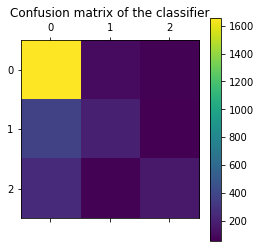

In [0]:
from sklearn.metrics import confusion_matrix
import pylab as pl
import numpy as np

x = predictions.select('label').collect()
y = predictions.select('prediction').collect()
cm = confusion_matrix(np.array(x), np.array(y))

result = result + "Confusion matrix: \n"+ str(cm)+"\n"
print('Confusion matrix: ')
print(cm)

# Draw confusion matrix
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [0]:
# Upload Ouput to S3
tweets_classification.write_data_to_output(result)

File datafile/Assignment_3_Q2_output.txt is uploaded to S3 bucket


In [0]:
# Below line of code will download the output file from S3 and display the result
check_data = boto3.client("s3",
                  aws_access_key_id = tweets_classification.aws_access_key_id,
                  aws_secret_access_key = tweets_classification.aws_secret_access_key)
        
output = check_data.get_object(Bucket = tweets_classification.bucket_name, Key = tweets_classification.output_file)

output = pd.read_csv(output['Body'])
output

,Metric Name and Value
0,Accuracy = 0.6880952380952381
1,F1 Val = 0.6579721705208506
2,Confusion matrix:
3,[[1658 107 66]
4,[ 373 196 57]
5,[ 249 65 169]]
